<a href="https://colab.research.google.com/github/NatalyaKuzina/NatalyaKuzina/blob/main/Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os
import zipfile

local_zip = '/content/drive/MyDrive/Colab Notebooks/Dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/tmp/')
zip_ref.close()

local_zip = '/content/drive/MyDrive/Colab Notebooks/Dogs_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/tmp/')
zip_ref.close()

In [3]:
dog_light_short_tail_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/tmp/Dogs/Dogs_light_short_tail')
dog_light_long_tail_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/tmp/Dogs/Dogs_light_long_tail')
dog_color_short_tail_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/tmp/Dogs/Dogs_color_short_tail')
dog_color_long_tail_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/tmp/Dogs/Dogs_color_long_tail')
dog_dark_short_tail_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/tmp/Dogs/Dogs_dark_short_tail')
dog_dark_long_tail_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/tmp/Dogs/Dogs_dark_long_tail')

print('total training dog_light_short_tail images:', len(os.listdir(dog_light_short_tail_dir)))
print('total training dog_light_long_tail images:', len(os.listdir(dog_light_long_tail_dir)))
print('total training dog_color_short_tail images:', len(os.listdir(dog_color_short_tail_dir)))
print('total training dog_color_long_tail images:', len(os.listdir(dog_color_long_tail_dir)))
print('total training dog_dark_short_tail images:', len(os.listdir(dog_dark_short_tail_dir)))
print('total training dog_dark_long_tail images:', len(os.listdir(dog_dark_long_tail_dir)))

dog_light_short_tail_files = os.listdir(dog_light_short_tail_dir)
print(dog_light_short_tail_files[:10])

dog_light_long_tail_files = os.listdir(dog_light_long_tail_dir)
print(dog_light_long_tail_files[:10])

dog_color_short_tail_files = os.listdir(dog_color_short_tail_dir)
print(dog_color_short_tail_files[:10])

dog_color_long_tail_files = os.listdir(dog_color_long_tail_dir)
print(dog_color_long_tail_files[:10])

dog_dark_short_tail_files = os.listdir(dog_dark_short_tail_dir)
print(dog_dark_short_tail_files[:10])

dog_dark_long_tail_files = os.listdir(dog_dark_long_tail_dir)
print(dog_dark_long_tail_files[:10])


total training dog_light_short_tail images: 243
total training dog_light_long_tail images: 175
total training dog_color_short_tail images: 160
total training dog_color_long_tail images: 123
total training dog_dark_short_tail images: 211
total training dog_dark_long_tail images: 143
['177.png', '2259.jpg', '2279.jpg', '212.jpg', '2302.jpg', '2311.jpg', '2320.jpg', '2326.jpg', '2327.jpg', '2271.jpg']
['126.png', '131.png', '134.jpg', '168.png', '149.jpg', '194.png', '203.jpg', '220.jpg', '210.jpg', '223.jpg']
['130.jpg', '135.png', '166.png', '138.jpg', '169.png', '175.png', '205.jpg', '2135.jpg', '2264.jpg', '2265.jpg']
['150.jpg', '162.jpg', '2295.jpg', '2354.jpg', '174.jpg', '2375.jpg', '190.jpg', '186.png', '195.png', '2349.jpg']
['165.jpg', '161.png', '170.png', '179.jpg', '211.png', '2132.jpg', '2214.jpg', '2258.jpg', '2261.jpg', '2287.jpg']
['141.jpg', '171.png', '192.png', '193.png', '2006.jpg', '204.png', '206.png', '218.png', '2217.jpg', '2339.jpg']


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dog_light_short_tail = [os.path.join(dog_light_short_tail_dir, fname)
                for fname in dog_light_short_tail_files[pic_index-2:pic_index]]
next_dog_light_long_tail = [os.path.join(dog_light_long_tail_dir, fname)
                for fname in dog_light_long_tail_files[pic_index-2:pic_index]]

next_dog_color_short_tail = [os.path.join(dog_color_short_tail_dir, fname)
                for fname in dog_color_short_tail_files[pic_index-2:pic_index]]
next_dog_color_long_tail = [os.path.join(dog_color_long_tail_dir, fname)
                for fname in dog_color_long_tail_files[pic_index-2:pic_index]]

next_dog_dark_short_tail = [os.path.join(dog_dark_short_tail_dir, fname)
                for fname in dog_dark_short_tail_files[pic_index-2:pic_index]]
next_dog_dark_long_tail = [os.path.join(dog_dark_long_tail_dir, fname)
                for fname in dog_dark_long_tail_files[pic_index-2:pic_index]]

# for i, img_path in enumerate(next_dog_light_short_tail+next_dog_light_long_tail+next_dog_color_short_tail+next_dog_color_long_tail+next_dog_dark_short_tail+next_dog_dark_long_tail):
#   print(img_path)
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

In [5]:
!pip install split-folders
dir = "/content/drive/MyDrive/Colab Notebooks/tmp/Dogs"
import splitfolders
splitfolders.ratio(dir, output="/content/drive/MyDrive/Colab Notebooks/tmp/", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 1055 files [05:17,  3.32 files/s]


In [6]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


# Define paths to your training and validation data directories

train_dir = "/content/drive/MyDrive/Colab Notebooks/tmp/train"
validation_dir = "/content/drive/MyDrive/Colab Notebooks/tmp/val"

# Define parameters for image preprocessing and augmentation
batch_size = 32
target_size = (150, 150)  # or the size you want your images to be resized to
class_mode = 'categorical'  # or 'binary' if you have two classes

# Create ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create ImageDataGenerator for validation data (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create train_generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

# Create val_generator
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

# # Define the model architecture
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # Add a fully connected layer with 512 units
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     # Output layer with 6 units (assuming 6 classes)
#     tf.keras.layers.Dense(6, activation='softmax')
# ])
# Загрузка предобученной модели VGG16
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Заморозка всех слоев предобученной модели
for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')

])

# Compile the model with accuracy metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# # Train the model and capture history
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=20,  # Increase the number of epochs
#     validation_data=val_generator,
#     validation_steps=len(val_generator)
# )


# # Retrieve val_loss and val_accuracy from history
# val_loss = history.history['val_loss']
# val_accuracy = history.history['val_accuracy']

# print("Validation Loss:", val_loss)
# print("Validation Accuracy:", val_accuracy)



Found 842 images belonging to 6 classes.
Found 104 images belonging to 6 classes.
58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
import os
import numpy as np
EPOCHS = 100
total_train = sum(len(files) for _, _, files in os.walk(train_dir))
total_val = sum(len(files) for _, _, files in os.walk(validation_dir))
history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

<ipython-input-10-9eba847929bc>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
27/27 [==============================] - 72s 3s/step - loss: 1.7026 - accuracy: 0.2637 - val_loss: 1.8043 - val_accuracy: 0.2692
Epoch 2/100
27/27 [==============================] - 57s 2s/step - loss: 1.6841 - accuracy: 0.2945 - val_loss: 1.8065 - val_accuracy: 0.2308
Epoch 3/100
27/27 [==============================] - 57s 2s/step - loss: 1.6981 - accuracy: 0.2827 - val_loss: 1.7875 - val_accuracy: 0.2788
Epoch 4/100
27/27 [==============================] - 53s 2s/step - loss: 1.6813 - accuracy: 0.2910 - val_loss: 1.8650 - val_accuracy: 0.2500
Epoch 5/100
27/27 [==============================] - 56s 2s/step - loss: 1.6905 - accuracy: 0.2886 - val_loss: 1.8560 - val_accuracy: 0.2885
Epoch 6/100
27/27 [==============================] - 56s 2s/step - loss: 1.7026 - accuracy: 0.2732 - val_loss: 1.8209 - val_accuracy: 0.2692
Epoch 7/100
27/27 [==============================] - 53s 2s/step - loss: 1.6957 - accuracy: 0.2957 - val_loss: 1.8697 - val_accuracy: 0.2788
Epoch 8/100
2

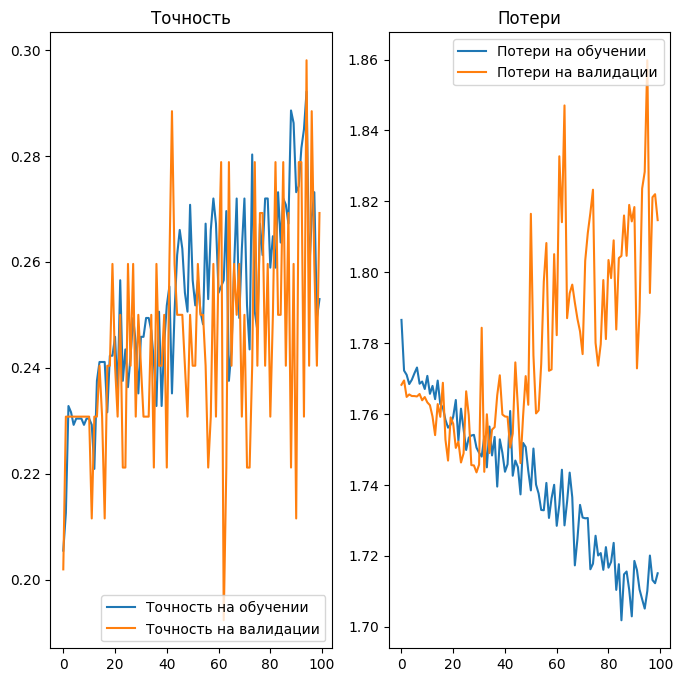

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
# epochs=10
epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери')
plt.savefig('./foo.png')
plt.show()

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')